In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import os
import sys
import random
import warnings
import math as m

import skimage.io
import skimage.filters
import skimage.morphology


from PIL import Image

from itertools import chain
from imageio import imread
from itertools import compress
from pathlib import Path
import natsort 

In [2]:
test_images_path = '/Volumes/DefratePrivate/Spine R01/AutoSegmentation/Results/Images/X/'
test_masks_path = '/Volumes/DefratePrivate/Spine R01/AutoSegmentation/Results/Images/Y/'
pred_masks_path = '/Volumes/DefratePrivate/Spine R01/AutoSegmentation/Results/Images/Pred/'
pred_PL_masks_path = '/Volumes/DefratePrivate/Spine R01/AutoSegmentation/Results/Images/PhysicalLayer/Pred/'

In [3]:
def filename_grabber(image_path = None, extensions = ['bmp']):
    """
   Grabs files names from directory and returns a list of their names
    
    Parameters
    ----------
    image_path : string
        Full file path that leads to image directory
        
    extensions : list of strings
        string of file extensions, without a period, within a list

    Returns
    -------
    file_names_images : list
        List of all specified files with predefined extensions 
        
    Notes
    -----
    """
    file_names_images = [fn for fn in os.listdir(image_path)
        if any(fn.endswith(ext) for ext in extensions)]
    file_names_images = natsort.natsorted(file_names_images,reverse=True)
    return file_names_images


def im_grab_upsampler(path,names,scale,masks_zero,up_masks_zero):
    for i in range(len(names)):
        mask = Image.open(path+names[i]).convert('LA')
        up_mask = mask.resize((round(mask.size[0]*scale), round(mask.size[1]*scale)),Image.BICUBIC)

        mask = np.array(mask)/255
    #     test_mask = test_mask[..., None]
        mask = mask[:,:,0]
        mask = mask[..., None]
#         mask = mask[1:,:-1] # adds subsequent image arrays to img matrix
        masks_zero[i] = mask

        up_mask = np.array(up_mask)/255
#         test_mask = test_mask[..., None]
        up_mask = up_mask[:,:,0]
        up_mask = up_mask[..., None]
#         up_mask = up_mask[scale:,:-scale]
        up_masks_zero[i] = up_mask
    return masks_zero,up_masks_zero
    

In [4]:
test_images_names = filename_grabber(test_images_path)
test_masks_names = filename_grabber(test_masks_path)
pred_masks_names = filename_grabber(pred_masks_path)
pred_PL_masks_names = filename_grabber(pred_PL_masks_path)
size = 160

Upsample images

In [5]:
scale = 9
test_masks = np.zeros((len(test_masks_names), 160, size, 1)).astype('float')
up_test_masks = np.zeros((len(test_masks_names), 160*scale, size*scale, 1)).astype('float')
test_masks,up_test_masks= im_grab_upsampler(test_masks_path,test_masks_names,scale,test_masks,up_test_masks)
print(test_masks.shape)
print(up_test_masks.shape)

(80, 160, 160, 1)
(80, 1440, 1440, 1)


In [6]:
pred_masks = np.zeros((len(test_masks_names), 160, size, 1)).astype('float')
up_pred_masks = np.zeros((len(test_masks_names), 160*scale, size*scale, 1)).astype('float')
pred_masks,up_pred_masks= im_grab_upsampler(pred_masks_path,pred_masks_names,scale,pred_masks,up_pred_masks)
print(test_masks.shape)
print(up_test_masks.shape)

(80, 160, 160, 1)
(80, 1440, 1440, 1)


In [7]:
test_images = np.zeros((len(test_masks_names), 160, size, 1)).astype('float')
up_test_images = np.zeros((len(test_masks_names), 160*scale, size*scale, 1)).astype('float')
test_images,up_test_images= im_grab_upsampler(test_images_path,test_images_names,scale,test_images,up_test_images)
print(test_images.shape)
print(up_test_images.shape)

(80, 160, 160, 1)
(80, 1440, 1440, 1)


In [8]:
pred_PL_masks = np.zeros((len(pred_PL_masks_names), 160, size, 1)).astype('float')
up_pred_PL_masks = np.zeros((len(pred_PL_masks_names), 160*scale, size*scale, 1)).astype('float')
pred__PL_masks,up_pred_PL_masks= im_grab_upsampler(pred_PL_masks_path,pred_PL_masks_names,scale,pred_PL_masks,up_pred_PL_masks)
print(test_masks.shape)
print(up_test_masks.shape)

(80, 160, 160, 1)
(80, 1440, 1440, 1)


Total volume of all IVD masks

V = sum of binary masks * voxel size

In [10]:
print('True Test Volume:     '+str(np.sum(test_masks)*(m.pow(0.875,3))))
print('Predicted Test Volume:'+str(np.sum(pred_masks)*(m.pow(0.875,3))))
print('Predicted PL Test Volume:'+str(np.sum(pred_PL_masks)*(m.pow(0.875,3))))

True Test Volume:     34330.81640625
Predicted Test Volume:30539.728515625
Predicted PL Test Volume:22133.548828125


Hard-coded L34 Volume

In [11]:
base_34_vol  = np.sum(test_masks[:,0:50,:])*(m.pow(0.875,3))
pred_34_vol  = np.sum(pred_masks[:,0:50,:])*(m.pow(0.875,3))
pred_PL_34_vol  = np.sum(pred_PL_masks[:,0:50,:])*(m.pow(0.875,3))
print('Predicted L34 Volume:'+str(pred_34_vol)+' mm^3')
print('True L34 Volume:     '+str(base_34_vol)+' mm^3')
print('Predicted PL L34 Volume:'+str(pred_PL_34_vol)+' mm^3')

Predicted L34 Volume:10198.220703125 mm^3
True L34 Volume:     11987.58203125 mm^3
Predicted PL L34 Volume:9210.755859375 mm^3


Hard-coded L45 Volume

In [12]:
base_45_vol  = np.sum(test_masks[:,51:90,:])*(m.pow(0.875,3))
pred_45_vol  = np.sum(pred_masks[:,51:90,:])*(m.pow(0.875,3))
pred_PL_45_vol  = np.sum(pred_PL_masks[:,51:90,:])*(m.pow(0.875,3))
print('Predicted L45 Volume:'+str(pred_45_vol)+' mm^3')
print('True L45 Volume:     '+str(base_45_vol)+' mm^3')
print('Predicted PL L45 Volume:'+str(pred_PL_45_vol)+' mm^3')

Predicted L45 Volume:11209.802734375 mm^3
True L45 Volume:     12495.3828125 mm^3
Predicted PL L45 Volume:8971.59375 mm^3


Hard-coded L51 Volume

In [13]:
base_51_vol  = np.sum(test_masks[:,91:,:])*(m.pow(0.875,3))
pred_51_vol  = np.sum(pred_masks[:,91:,:])*(m.pow(0.875,3))
pred_PL_51_vol  = np.sum(pred_PL_masks[:,91:,:])*(m.pow(0.875,3))
print('Predicted L51 Volume:'+str(pred_51_vol)+' mm^3')
print('True L51 Volume:     '+str(base_51_vol)+' mm^3')
print('Predicted PL L51 Volume:'+str(pred_PL_51_vol)+' mm^3')

Predicted L51 Volume:9131.705078125 mm^3
True L51 Volume:     9847.8515625 mm^3
Predicted PL L51 Volume:3951.19921875 mm^3


Sanity Check Total Volumes

In [14]:
print('Hard-coded IVD level-wise sum: '+str(base_34_vol+base_45_vol+base_51_vol)+' mm^3')
print('Total IVD mask volume:         ' +str(np.sum(test_masks)*(m.pow(0.875,3)))+' mm^3')

Hard-coded IVD level-wise sum: 34330.81640625 mm^3
Total IVD mask volume:         34330.81640625 mm^3


In [15]:
def dice(im1, im2):
    """
    Computes the Dice coefficient, a measure of set similarity.
    Parameters
    ----------
    im1 : array-like, bool
        Any array of arbitrary size. If not boolean, will be converted.
    im2 : array-like, bool
        Any other array of identical size. If not boolean, will be converted.
    Returns
    -------
    dice : float
        Dice coefficient as a float on range [0,1].
        Maximum similarity = 1
        No similarity = 0
        
    Notes
    -----
    The order of inputs for `dice` is irrelevant. The result will be
    identical if `im1` and `im2` are switched.
    """
    if im1.sum() !=0 and im2.sum() !=0:
        im1 = np.asarray(im1).astype(np.bool)
        im2 = np.asarray(im2).astype(np.bool)

        if im1.shape != im2.shape:
            raise ValueError("Shape mismatch: im1 and im2 must have the same shape.")

        # Compute Dice coefficient
        intersection = np.logical_and(im1, im2)
        dce = 2. * intersection.sum() / (im1.sum() + im2.sum())
    else:
        return np.nan
    return dce

Print Dice similarity scores

NaN == No segmentation in test or pred image

In [16]:
pred_dce = np.zeros((len(pred_masks),1)).astype('float')
pred_dce_34 = np.zeros((len(pred_masks),1)).astype('float')
pred_dce_45 = np.zeros((len(pred_masks),1)).astype('float')
pred_dce_51 = np.zeros((len(pred_masks),1)).astype('float')
for i in range(len(pred_masks)-1):
    pred_dce[i] =dice(pred_masks[i+1],test_masks[i])
    pred_dce_34[i] =dice(pred_masks[i+1,:50,:],test_masks[i,:50,:])
    pred_dce_45[i] =dice(pred_masks[i+1,51:91,:],test_masks[i,51:91,:])
    pred_dce_51[i] =dice(pred_masks[i+1,91:],test_masks[i,91:])

In [17]:
pred_PL_dce = np.zeros((len(pred_PL_masks),1)).astype('float')
pred_PL_dce_34 = np.zeros((len(pred_masks),1)).astype('float')
pred_PL_dce_45 = np.zeros((len(pred_masks),1)).astype('float')
pred_PL_dce_51 = np.zeros((len(pred_masks),1)).astype('float')
for i in range(len(pred_PL_masks)):
    pred_PL_dce[i] =dice(pred_PL_masks[i],test_masks[i])
    pred_PL_dce_34[i] =dice(pred_PL_masks[i,:50,:],test_masks[i,:50,:])
    pred_PL_dce_45[i] =dice(pred_PL_masks[i,51:91,:],test_masks[i,51:91,:])
    pred_PL_dce_51[i] =dice(pred_PL_masks[i,91:],test_masks[i,91:])
    

In [18]:
print('Pred Mean Dice:'+ str(np.nanmean(pred_dce)))
print('Pred PL Mean Dice:'+ str(np.nanmean(pred_PL_dce)))

Pred Mean Dice:0.6682921380957623
Pred PL Mean Dice:0.6382664700463833


In [19]:
print('Pred 34 Mean Dice:'+ str(np.nanmean(pred_dce_34)))
print('Pred 45 Mean Dice:'+ str(np.nanmean(pred_dce_45)))
print('Pred 51 Mean Dice:'+ str(np.nanmean(pred_dce_51)))

Pred 34 Mean Dice:0.6568886907024134
Pred 45 Mean Dice:0.7886160124251976
Pred 51 Mean Dice:0.7045735761204341


In [20]:
print('Pred PL 34 Mean Dice:'+ str(np.nanmean(pred_PL_dce_34)))
print('Pred PL 45 Mean Dice:'+ str(np.nanmean(pred_PL_dce_45)))
print('Pred PL 51 Mean Dice:'+ str(np.nanmean(pred_PL_dce_51)))

Pred PL 34 Mean Dice:0.7154658231519627
Pred PL 45 Mean Dice:0.772889171813112
Pred PL 51 Mean Dice:0.4703930296462076


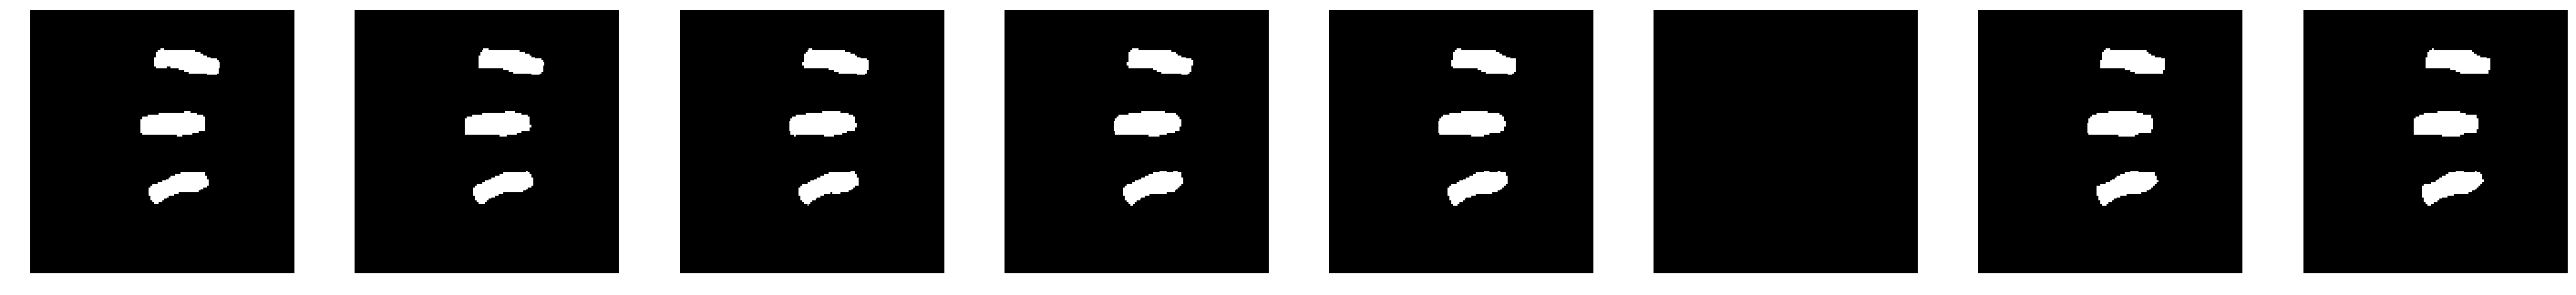

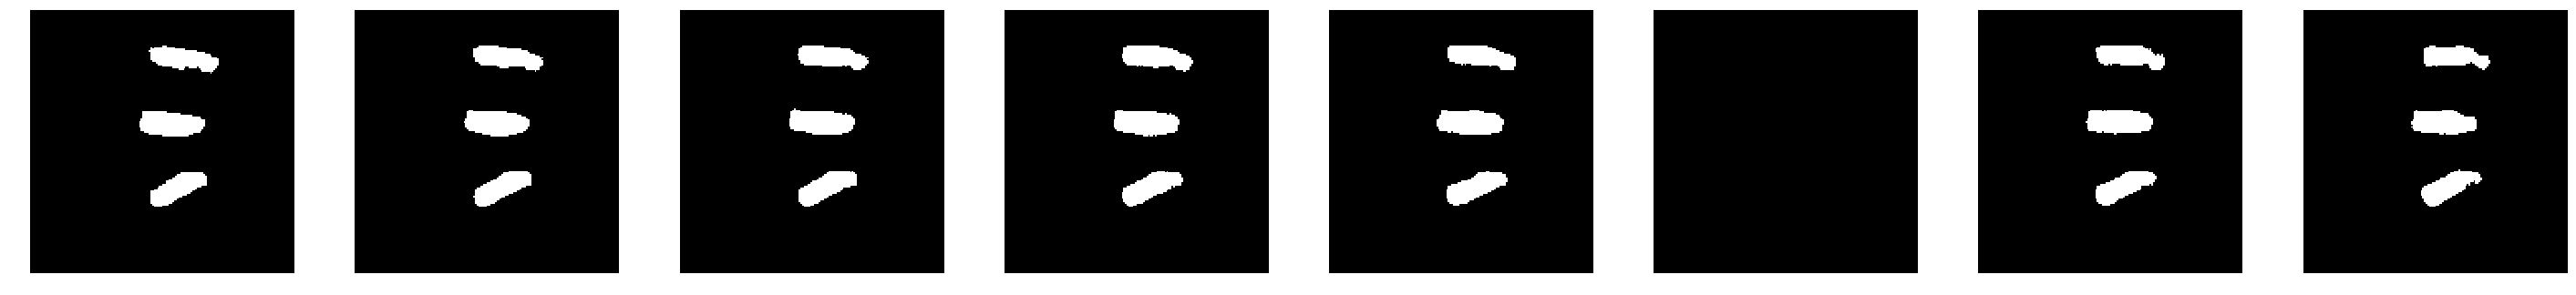

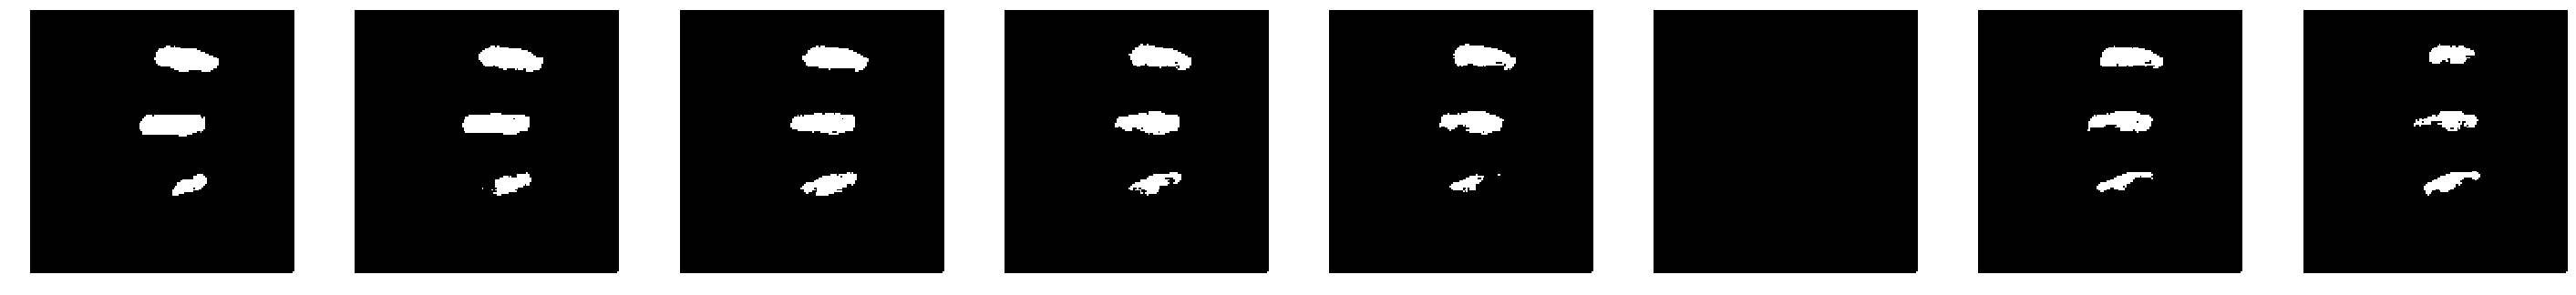

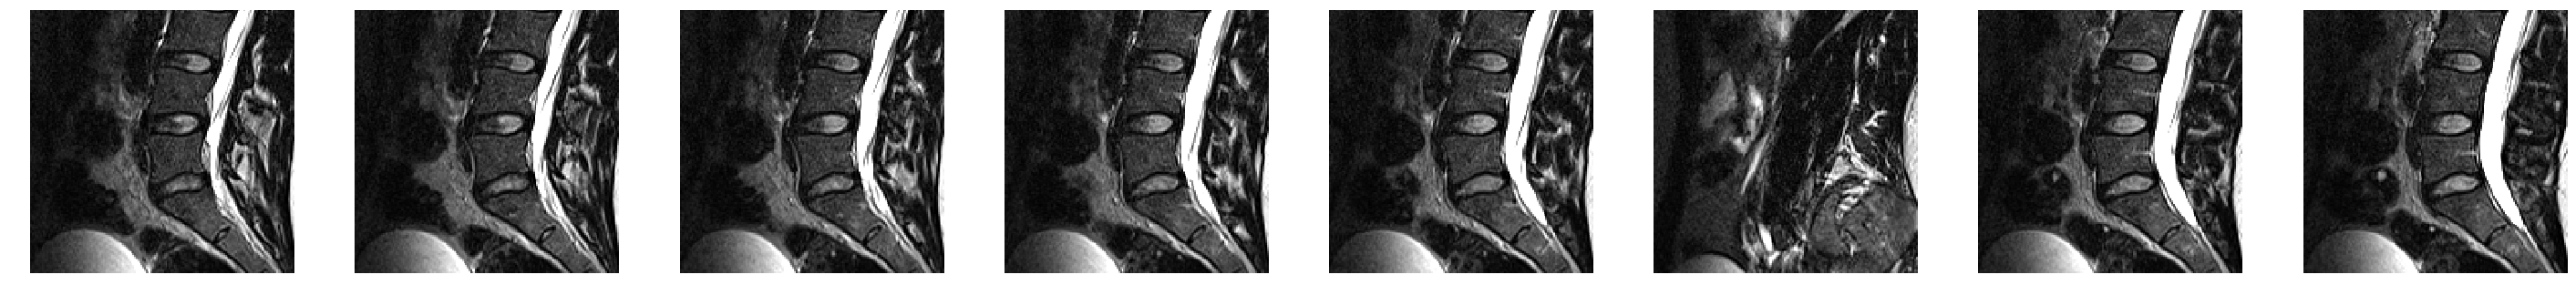

In [28]:
import matplotlib.gridspec as gridspec
def plot_examples(batch):
    plt.figure(figsize=(50, 50))
    for i in range(len(batch)):
        plt.subplot(8, 8, i+1)
        plt.imshow(batch[i])
        gs1 = gridspec.GridSpec(8, 8)
        gs1.update(wspace=0.0025, hspace=0.05) 
#         plt.colorbar()
        plt.axis('off')
        plt.gray()
    plt.show()
    gs1.update(wspace=0.0025, hspace=0.05) 
plot_examples(np.sum(test_masks[40:48],axis=3)) # display the test images
plot_examples(np.sum(pred_masks[40:48],axis=3)) # display the test masks
plot_examples(np.sum(pred_PL_masks[40:48],axis=3)) # display the test masks
plot_examples(np.sum(test_images[40:48], axis=3)) # display thresholded images

In [29]:
import os
import imageio

png_dir =  '/Volumes/DefratePrivate/Spine R01/AutoSegmentation/Results/Images/X/'
images = []
for file_name in test_images_names:
    if file_name.endswith('.bmp'):
        file_path = os.path.join(png_dir, file_name)
        images.append(imageio.imread(file_path))
imageio.mimsave('/Volumes/DefratePrivate/Spine R01/AutoSegmentation/gif/Test_ims.gif', images)

In [30]:
def contour_gen_from_mask(masks,scale = 1):
    L34_pcloud_out = np.empty((0,3))
    L45_pcloud_out = np.empty((0,3))
    L51_pcloud_out = np.empty((0,3))
    for i in range(len(masks)):

        sliceInd = i
        image = np.reshape(masks[i],(160*scale,160*scale))
        L34_im = image[:50*scale,:]
        L45_im = image[51*scale:91*scale,:]
        L51_im = image[91*scale:,:]
        if np.max(L34_im)>=1.0:
        # image = image[..., None]

            #dilate to avoid loosing small elements on edges
            image_dil = skimage.morphology.binary_dilation(L34_im, np.ones((1,1)))
            #make the image smooth
            image_gauss = skimage.filters.gaussian(L34_im, sigma=0.0001)
            #automatic threshold
            image_th = skimage.filters.threshold_otsu(image_gauss)
            #find contour
            contour = skimage.measure.find_contours(image_gauss>image_th, level = 0.005)
            L34_point_cloud = np.insert(contour[0][:], 0, sliceInd, axis=1)
            L34_pcloud_out = np.append(L34_pcloud_out,L34_point_cloud,axis = 0)
        if np.max(L45_im)>=1.0:
        # image = image[..., None]

            #dilate to avoid loosing small elements on edges
            image_dil = skimage.morphology.binary_dilation(L45_im, np.ones((1,1)))
            #make the image smooth
            image_gauss = skimage.filters.gaussian(L45_im, sigma=0.0001)
            #automatic threshold
            image_th = skimage.filters.threshold_otsu(image_gauss)
            #find contour
            contour = skimage.measure.find_contours(image_gauss>image_th, level = 0.005)
            L45_point_cloud = np.insert(contour[0][:], 0, sliceInd, axis=1)
            L45_pcloud_out = np.append(L45_pcloud_out,L45_point_cloud,axis = 0)
        if np.max(L51_im)>=1.0:
        # image = image[..., None]

            #dilate to avoid loosing small elements on edges
            image_dil = skimage.morphology.binary_dilation(L51_im, np.ones((1,1)))
            #make the image smooth
            image_gauss = skimage.filters.gaussian(L51_im, sigma=0.0001)
            #automatic threshold
            image_th = skimage.filters.threshold_otsu(image_gauss)
            #find contour
            contour = skimage.measure.find_contours(image_gauss>image_th, level = 0.005)
            L51_point_cloud = np.insert(contour[0][:], 0, sliceInd, axis=1)
            L51_pcloud_out = np.append(L51_pcloud_out,L51_point_cloud,axis = 0)
    return L34_pcloud_out,L45_pcloud_out,L51_pcloud_out

In [31]:
 L34_data,L45_data,L51_data = contour_gen_from_mask(test_masks)

In [32]:
np.savetxt("L34_data.csv", L34_data, delimiter=",")
np.savetxt("L45_data.csv", L45_data, delimiter=",")
np.savetxt("L51_data.csv", L51_data, delimiter=",")

In [33]:
 L34_pred_data,L45_pred_data,L51_pred_data = contour_gen_from_mask(pred_masks)

In [34]:
np.savetxt("L34_pred_data.csv", L34_pred_data, delimiter=",")
np.savetxt("L45_pred_data.csv", L45_pred_data, delimiter=",")
np.savetxt("L51_pred_data.csv", L51_pred_data, delimiter=",")

In [35]:
 L34_pred_PL_data,L45_pred_PL_data,L51_pred_PL_data = contour_gen_from_mask(pred_PL_masks)

In [36]:
np.savetxt("L34_pred_PL_data.csv", L34_pred_PL_data, delimiter=",")
np.savetxt("L45_pred_PL_data.csv", L45_pred_PL_data, delimiter=",")
np.savetxt("L51_pred_PL_data.csv", L51_pred_PL_data, delimiter=",")